In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches

# Excercise 1

 Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

In [58]:
#print out duplicate rows in order and find if the unique row are repeat appear in next rows
df=pd.read_csv("covid19-cdc-20211294.csv")
df.to_csv("covid19-cdc-20211294.csv",index=False)

#check how many rows and columns are in the file
df.shape


(20000, 19)

In [3]:
#read the first 5 rows of file
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,OR,41.0,JOSEPHINE,41033.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Laboratory reported,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN
1,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
2,2021-02,PA,42.0,ALLEGHENY,42003.0,65+ years,Male,White,Non-Hispanic/Latino,4.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
3,2020-04,NY,36.0,WESTCHESTER,36119.0,65+ years,Female,Missing,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4,2020-12,NV,32.0,CLARK,32003.0,65+ years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Yes


In [4]:
#read the last 5 rows of file
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19995,2022-07,KS,20.0,SEDGWICK,20173.0,18 to 49 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
19996,2021-01,NC,37.0,NASH,37127.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Asymptomatic,Unknown,Unknown,No,NaN
19997,2021-12,NY,36.0,SUFFOLK,36103.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19998,2022-08,NC,37.0,NaN,NaN,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19999,2022-02,IN,18.0,VIGO,18167.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


In [5]:
#see which type is every colomn
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [67]:
#Convert the features to their appropriate data types
df["sex"]=df["sex"].astype('category')
df["race"]=df["race"].astype("category")
df["ethnicity"]=df["ethnicity"].astype("category")
df["case_positive_specimen_interval"]=df["case_positive_specimen_interval"].astype("Int64")
df["case_onset_interval"]=df["case_onset_interval"].astype("Int64")
df["process"]=df["process"].astype("category")
df["current_status"]=df["current_status"].astype("category")
df["symptom_status"]=df["symptom_status"].astype("category")
df["hosp_yn"]=df["hosp_yn"].astype("category")
df["death_yn"]=df["death_yn"].astype("category")
df["state_fips_code"]=df["state_fips_code"].astype("category")
df["res_state"]=df["res_state"].astype("category")
df["res_county"]=df["res_county"].astype("category")
df["age_group"]=df["age_group"].astype("category")
df["icu_yn"]=df["icu_yn"].astype("category")
df["case_month"]=df["case_month"].astype("category")
df["county_fips_code"]=df["county_fips_code"].astype("category")
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval       Int64
case_onset_interval                   Int64
process                            category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
dtype: object

In [7]:
#check duplicate rows
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated(keep=False).sum())

Number of duplicate (excluding first) rows in the table is:  1910


In [8]:
#check duplicate columns
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0


In [10]:
#check which row is duplicate
df=df.drop_duplicates()
df.shape

(18926, 19)

In [ ]:
#check how many data is "Missing" in "process" ,"exposure_yn" and "underlying_conditions_yn" column
process_missing = df['process'].str.contains('Missing', na=False)
count_process=process_missing.sum()

exposure_yn_missing = df['exposure_yn'].str.contains('Missing', na=False)
count_exposure_yn=exposure_yn_missing.sum()
exposure_yn_yes = df['exposure_yn'].str.contains('No', na=False)
count_exposure_yn_yes=exposure_yn_yes.sum()

underlying_conditions_yn_missing = df['underlying_conditions_yn'].str.contains('Missing', na=False)
count_underlying_conditions_yn=underlying_conditions_yn_missing.sum()
underlying_conditions_yn_yes = df['underlying_conditions_yn'].str.contains('Yes', na=False)
count_underlying_conditions_yn_yes=underlying_conditions_yn_yes.sum()

print(count_process,count_exposure_yn,count_exposure_yn_yes,count_underlying_conditions_yn_yes,count_underlying_conditions_yn)
#There are nearly 90% data in 'exposure_yn' are missing , the rest is yes, so I'll drop this feature
#There are over 90% data in 'underlying_conditions_yn' are null, so it's meaningless to analysis this column
df=df.drop('exposure_yn ',axis=1) 
df=df.drop('underlying_conditions_yn ',axis=1) 

In [68]:
#Look for constant columns
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,20000,35,2022-01,2735
res_state,19999,49,NY,2174
state_fips_code,19999.0,49.0,36.0,2174.0
res_county,18860,859,MIAMI-DADE,408
county_fips_code,18860.0,1218.0,12086.0,408.0
age_group,19867,5,18 to 49 years,7709
sex,19580,4,Female,10092
race,17658,8,White,12350
ethnicity,17483,4,Non-Hispanic/Latino,11935
process,20000,10,Missing,18261


In [24]:
#check how amny negative data are there in "case_positive_specimen_interval" column
case_positive_specimen_interval_negative=df['case_positive_specimen_interval'][df['case_positive_specimen_interval']<0]
print(case_positive_specimen_interval_negative.count())
new_case_positive_specimen_interval=df['case_positive_specimen_interval'][df['case_positive_specimen_interval']>=0]
print(new_case_positive_specimen_interval.count())

62
10519


In [25]:
#check how amny negative data are there in "case_onset_interval" column
case_onset_interval_negative=df['case_onset_interval'][df['case_onset_interval']<0]
print(case_onset_interval_negative.count())
new_case_onset_interval=df['case_onset_interval'][df['case_onset_interval']>=0]
print(new_case_onset_interval.count())

291
8375


In [26]:
#convert all negative value into positive
df['case_onset_interval']=df['case_onset_interval'].abs()
df['case_positive_specimen_interval']=df['case_positive_specimen_interval'].abs()

In [27]:
#draw a table for continues data
continuous_features = df.select_dtypes(['Int64']).columns
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,10581.0,0.25111,2.417403,0.0,0.0,0.0,0.0,102.0
case_onset_interval,8666.0,0.160512,2.065118,0.0,0.0,0.0,0.0,105.0


In [11]:
#this step is for using in later excercise
new=df[df.isin(['Missing'])]
print(new.count())

case_month                             0
res_state                              0
state_fips_code                        0
res_county                             0
county_fips_code                       0
age_group                             26
sex                                   13
race                                 754
ethnicity                           1056
case_positive_specimen_interval        0
case_onset_interval                    0
process                            18261
exposure_yn                        17283
current_status                         0
symptom_status                      8317
hosp_yn                             4462
icu_yn                             15492
death_yn                               0
underlying_conditions_yn               0
dtype: int64


In [12]:
#this step is for using in later excercise
new1=df[df.isin(['Unknown'])]
print(new1.count())

case_month                            0
res_state                             0
state_fips_code                       0
res_county                            0
county_fips_code                      0
age_group                             0
sex                                  94
race                               1685
ethnicity                          2732
case_positive_specimen_interval       0
case_onset_interval                   0
process                              68
exposure_yn                         760
current_status                        0
symptom_status                     2325
hosp_yn                            2411
icu_yn                             2853
death_yn                              0
underlying_conditions_yn              0
dtype: int64


In [64]:
df.to_csv("new_file.csv", index=False)

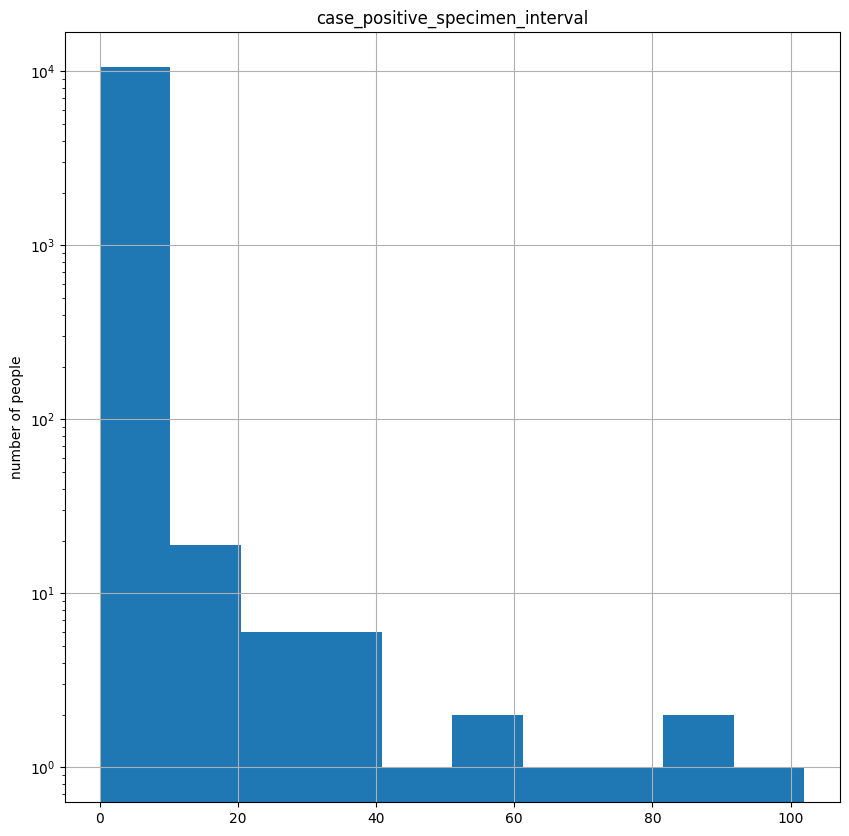

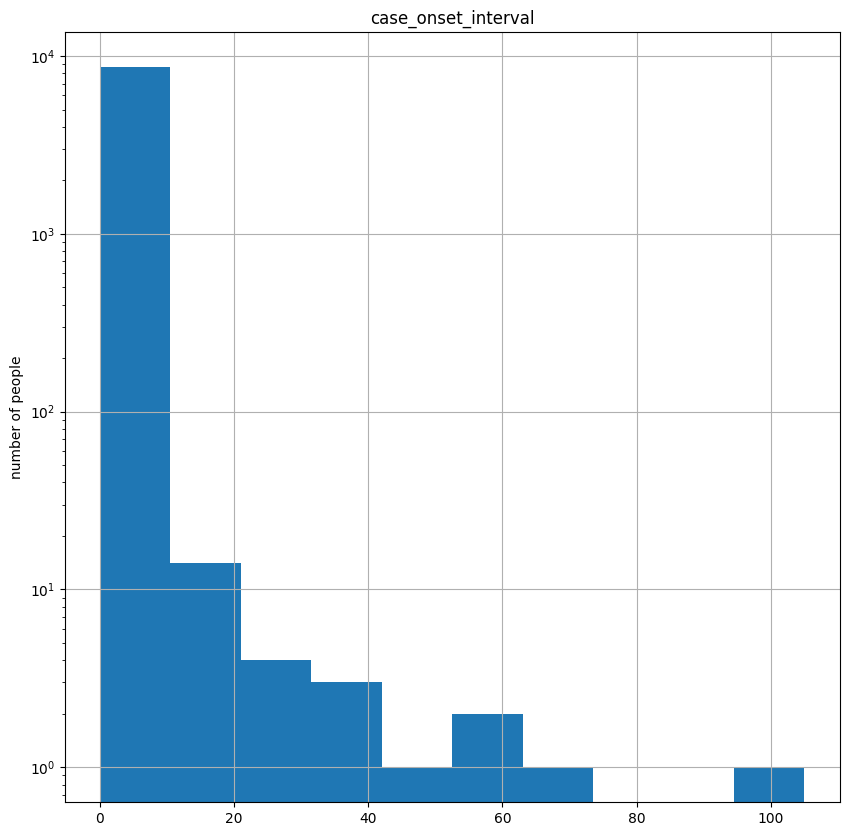

In [16]:
#draw histograms for all the continuous features
continuous_datas=['case_positive_specimen_interval','case_onset_interval']

with PdfPages('continuous_histograms_1-2.pdf') as pp:
    for i in continuous_datas:
            f = df[i].hist(figsize=(10,10), bins=10,log=True)
            plt.title(i)
            plt.ylabel('number of people')
            pp.savefig(f.get_figure())
            plt.show()   




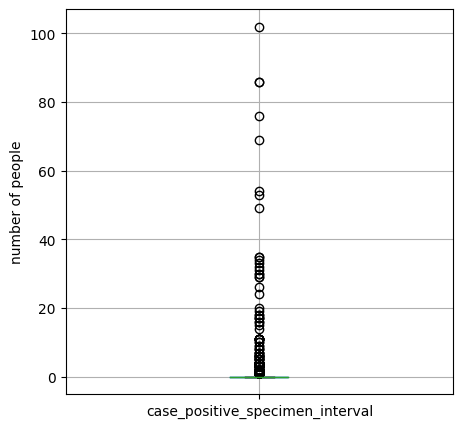

In [17]:
#box plots for all the continuous features.
df['case_positive_specimen_interval'].boxplot(figsize=(5,5))
plt.ylabel('number of people')
box plots for all the continuous features.plt.savefig('continuous_boxplots__summary1-2.pdf')

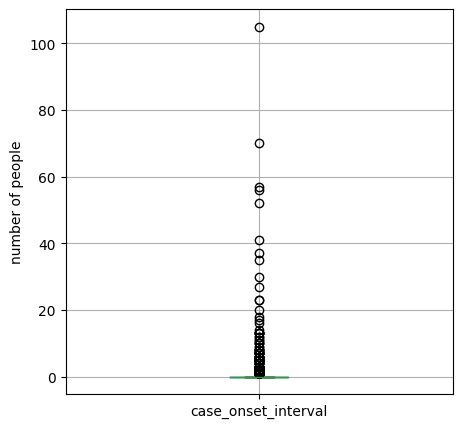

In [18]:
#box plots for all the continuous features.
df['case_onset_interval'].boxplot(figsize=(5,5))
plt.ylabel('number of people')
plt.savefig('continuous_boxplots__summary1-3.pdf')

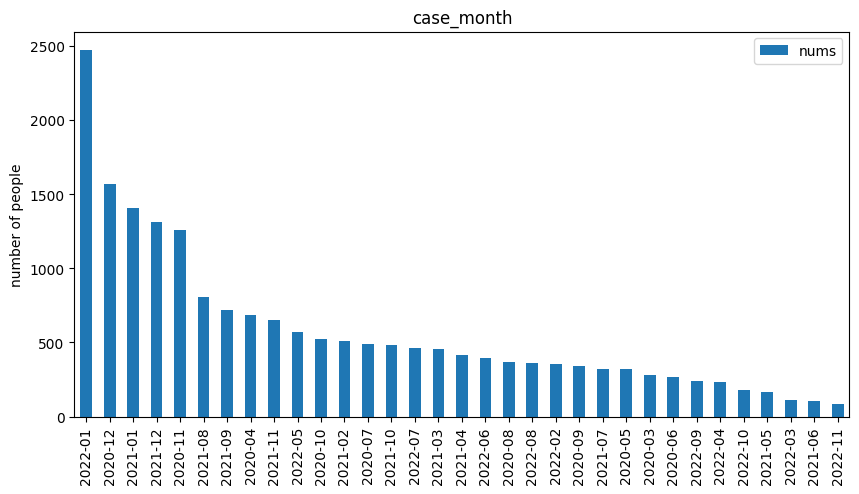

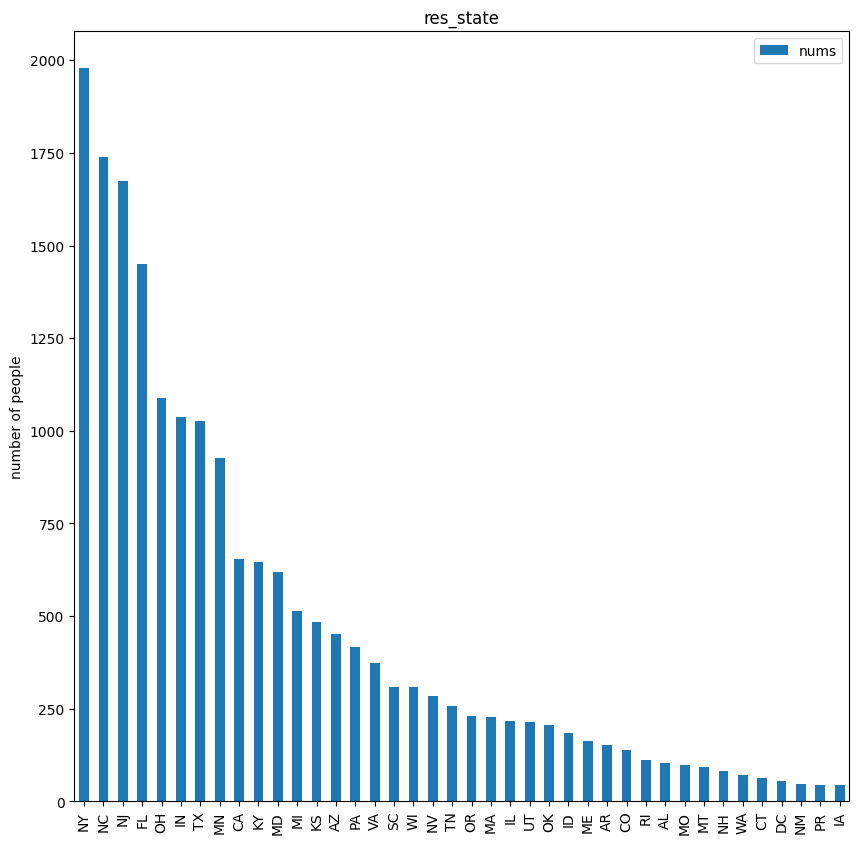

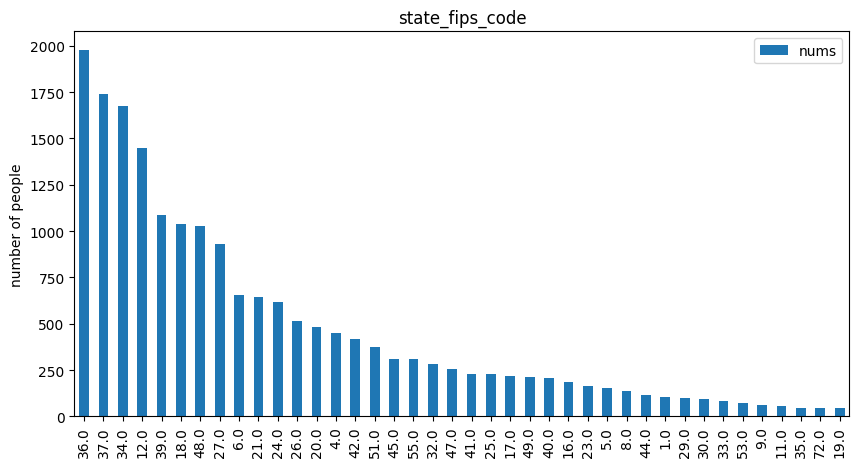

In [26]:
#in order to reduce the length of chart for reading easier, just draw bar plot with amount greater than 40
new_case_month = pd.DataFrame(df['case_month'].value_counts())
new_case_month.columns = ['nums']
new_case_month = new_case_month[new_case_month['nums'] >40]

new_res_state = pd.DataFrame(df['res_state'].value_counts())
new_res_state.columns = ['nums']
new_res_state = new_res_state[new_res_state['nums'] >40]

new_state_fips_code = pd.DataFrame(df['state_fips_code'].value_counts())
new_state_fips_code.columns = ['nums']
new_state_fips_code = new_state_fips_code[new_state_fips_code['nums'] >40]

category_data2=[new_case_month,new_res_state,new_state_fips_code]
category_data1=['case_month','res_state','state_fips_code']

def draw_category_data(lst1,lst2):
    with PdfPages('category_barplots_1-1.pdf') as pp:
        for i in range(len(lst1)):
            if i==1:
                f = lst1[i].plot(kind='bar',figsize=(10,10))
            else:
                f = lst1[i].plot(kind='bar',figsize=(10,5))
            plt.title(lst2[i])
            plt.ylabel('number of people')
            pp.savefig(f.get_figure())
            plt.show()
draw_category_data(category_data2,category_data1)          

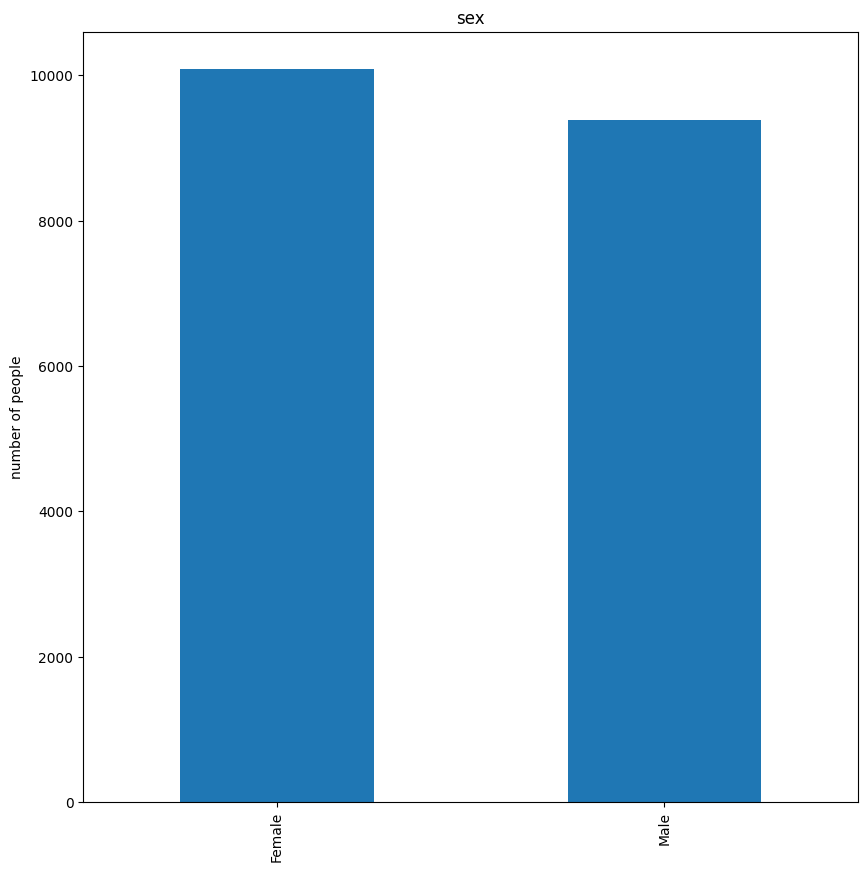

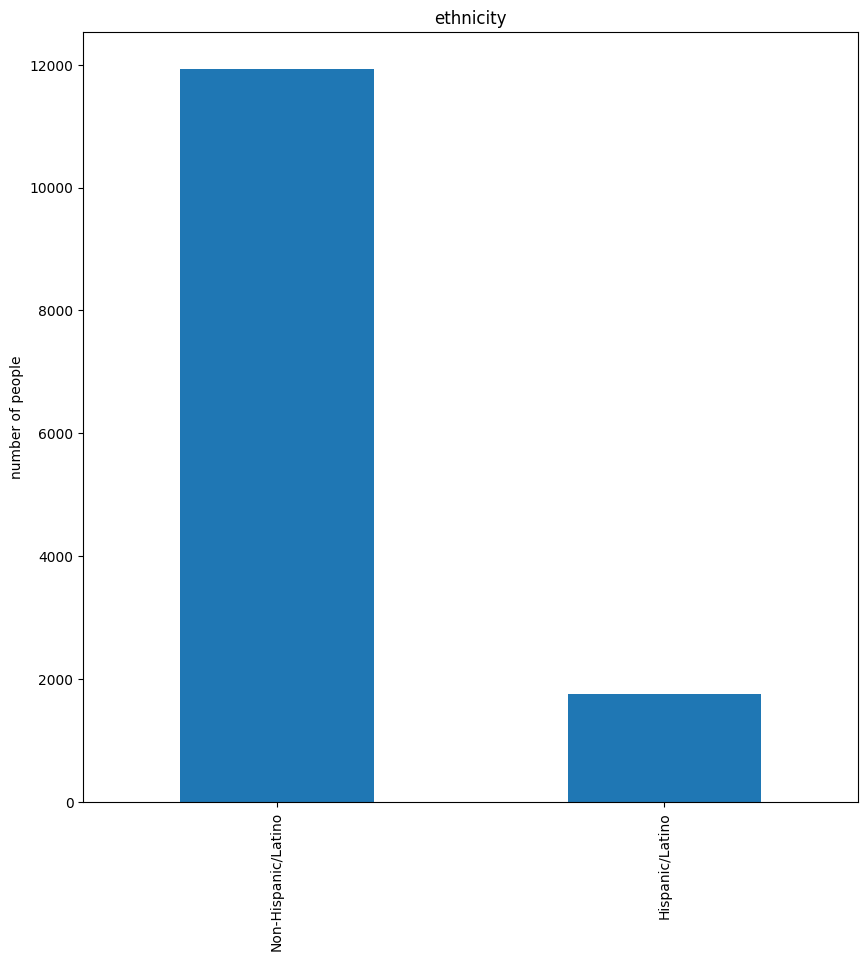

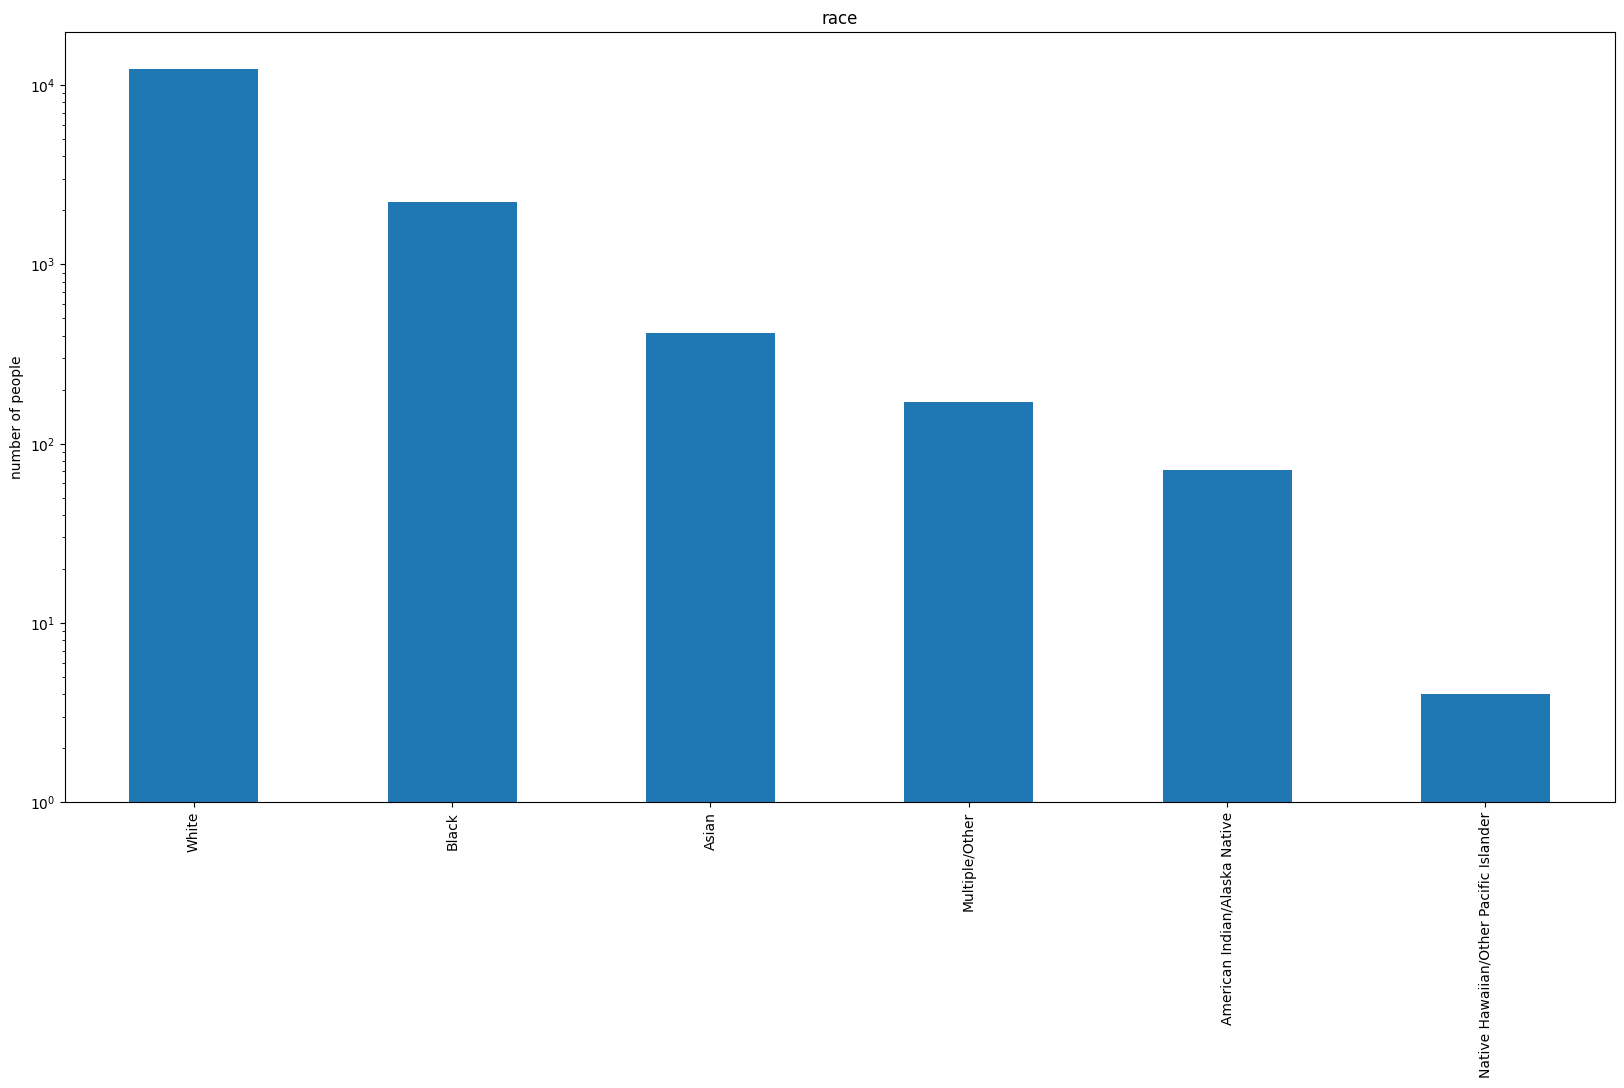

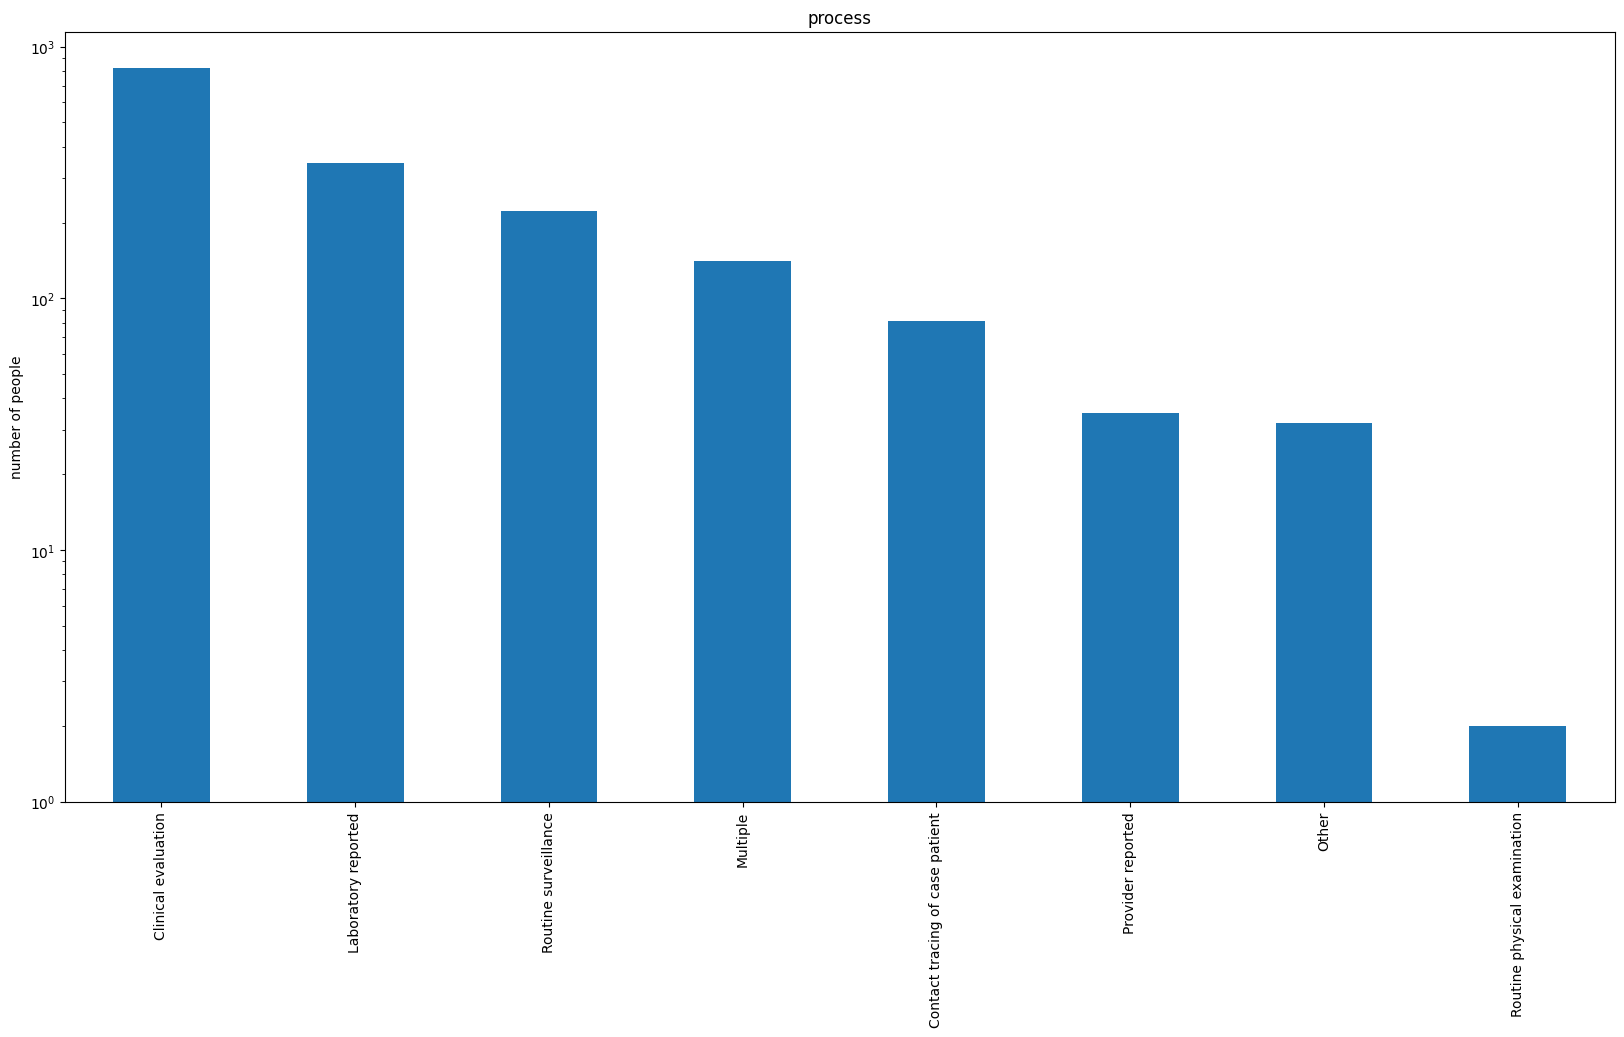

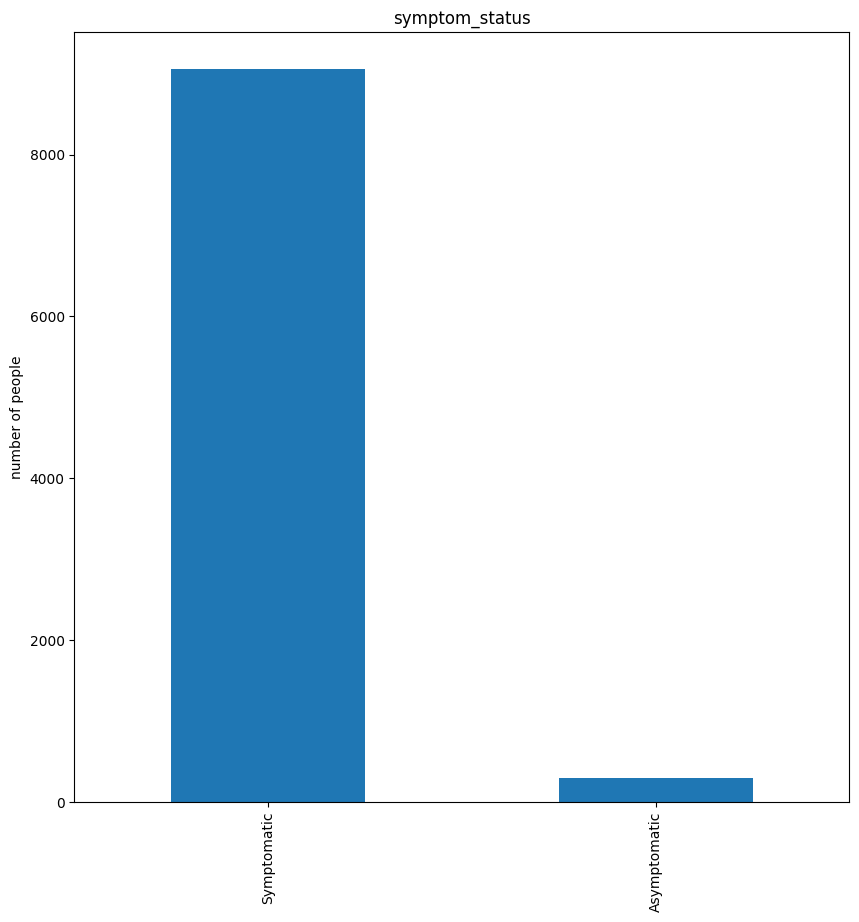

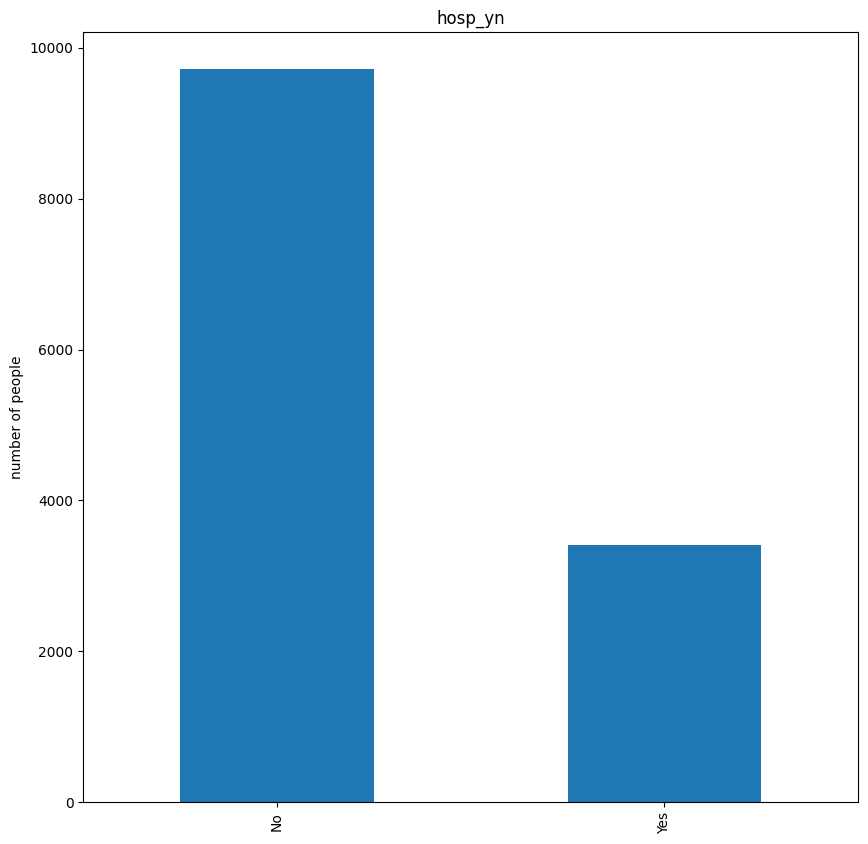

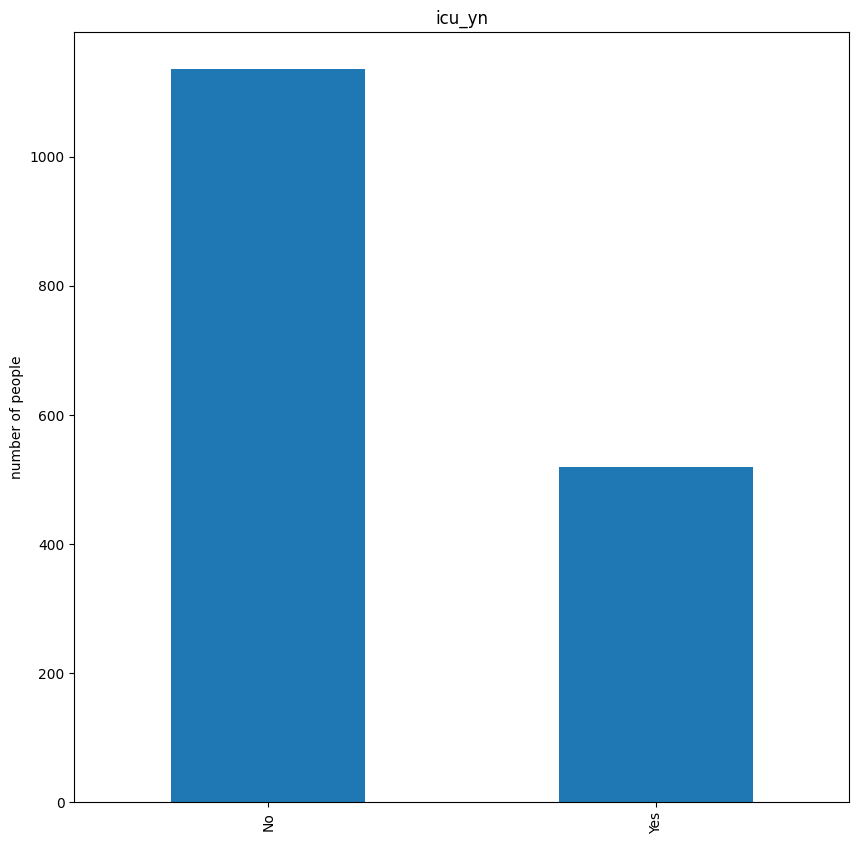

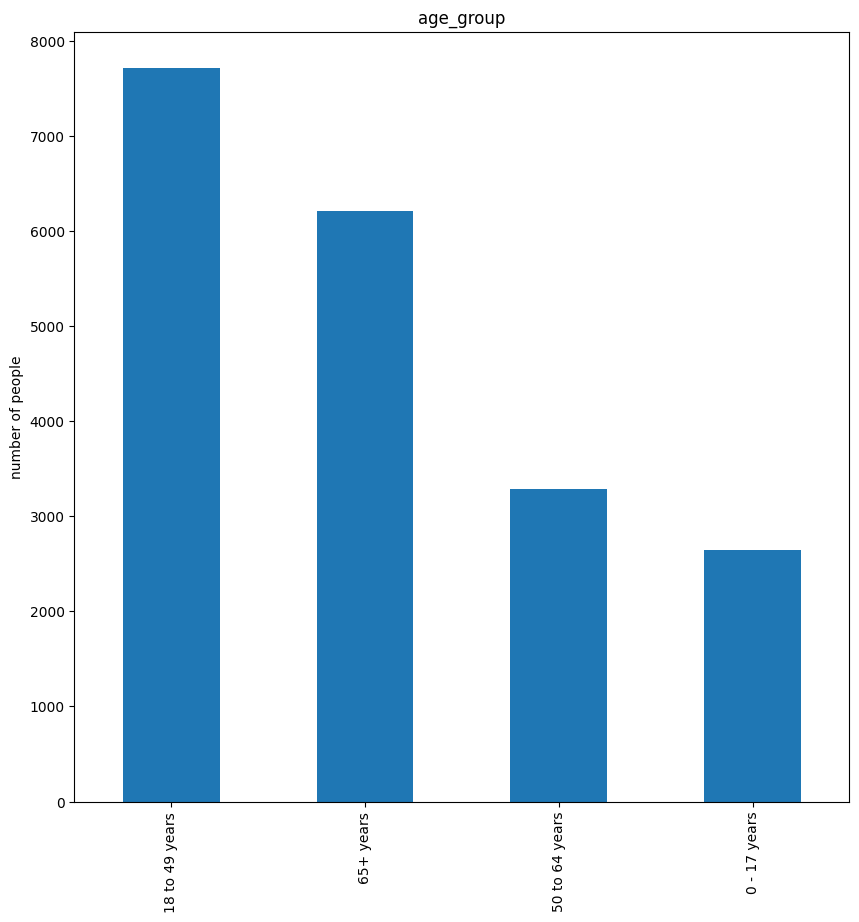

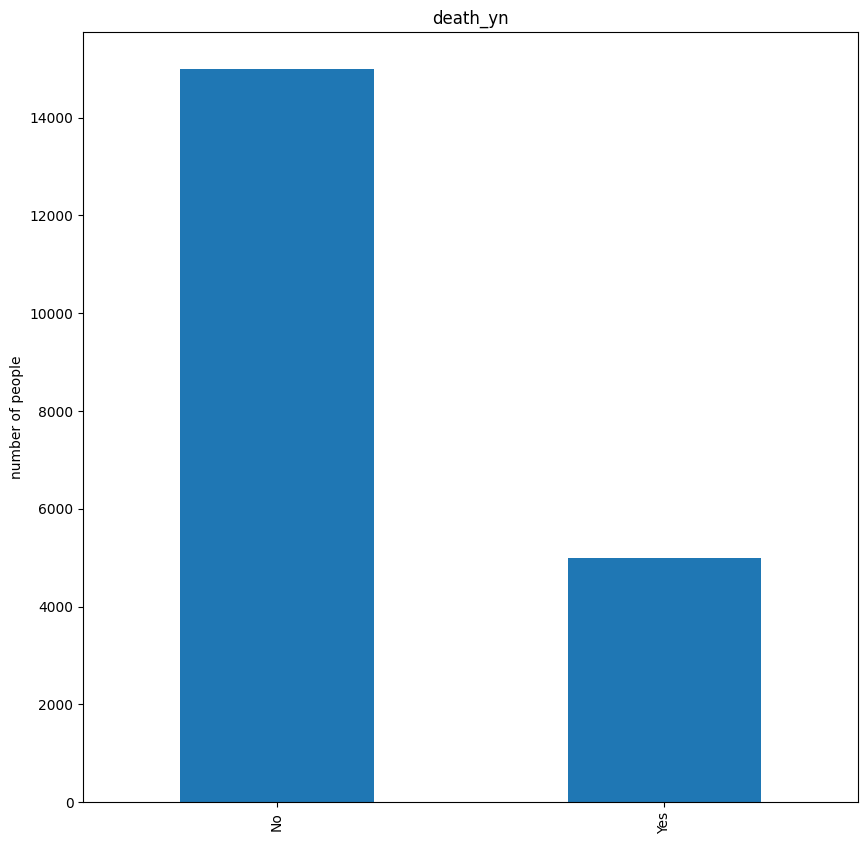

In [34]:
#draw a plot bar without missing and unknown data
new_sex=df[~df['sex'].isin(['Missing','Unknown'])]
new_ethnicity=df[~df['ethnicity'].isin(['Missing','Unknown'])]
new_race=df[~df['race'].isin(['Missing','Unknown'])]
new_process=df[~df['process'].isin(['Missing','Unknown'])]
new_symptom_status=df[~df['symptom_status'].isin(['Missing','Unknown'])]
new_hosp_yn=df[~df['hosp_yn'].isin(['Missing','Unknown'])]
new_icu_yn=df[~df['icu_yn'].isin(['Missing','Unknown'])]
new_age=df[~df['age_group'].isin(['Missing','Unknown'])]
new_death_yn=df[~df['death_yn'].isin(['Missing','Unknown'])]
category_data1=['sex','ethnicity','race','process','symptom_status','hosp_yn','icu_yn','age_group','death_yn']
new_data=[new_sex,new_ethnicity,new_race,new_process,new_symptom_status,new_hosp_yn,new_icu_yn,new_age,new_death_yn]

def draw(lst1,lst2):
    with PdfPages('category_barplots_1-2.pdf') as pp:
        for i in range(len(lst1)):
            if i==2 or i==3 :
                f = lst1[i][lst2[i]].value_counts().plot(kind='bar',figsize=(20,10),log=True)
            else:
                f = lst1[i][lst2[i]].value_counts().plot(kind='bar',figsize=(10,10))
            plt.title(lst2[i])
            plt.ylabel('number of people')
            pp.savefig(f.get_figure())
            plt.show()   

draw(new_data,category_data1)

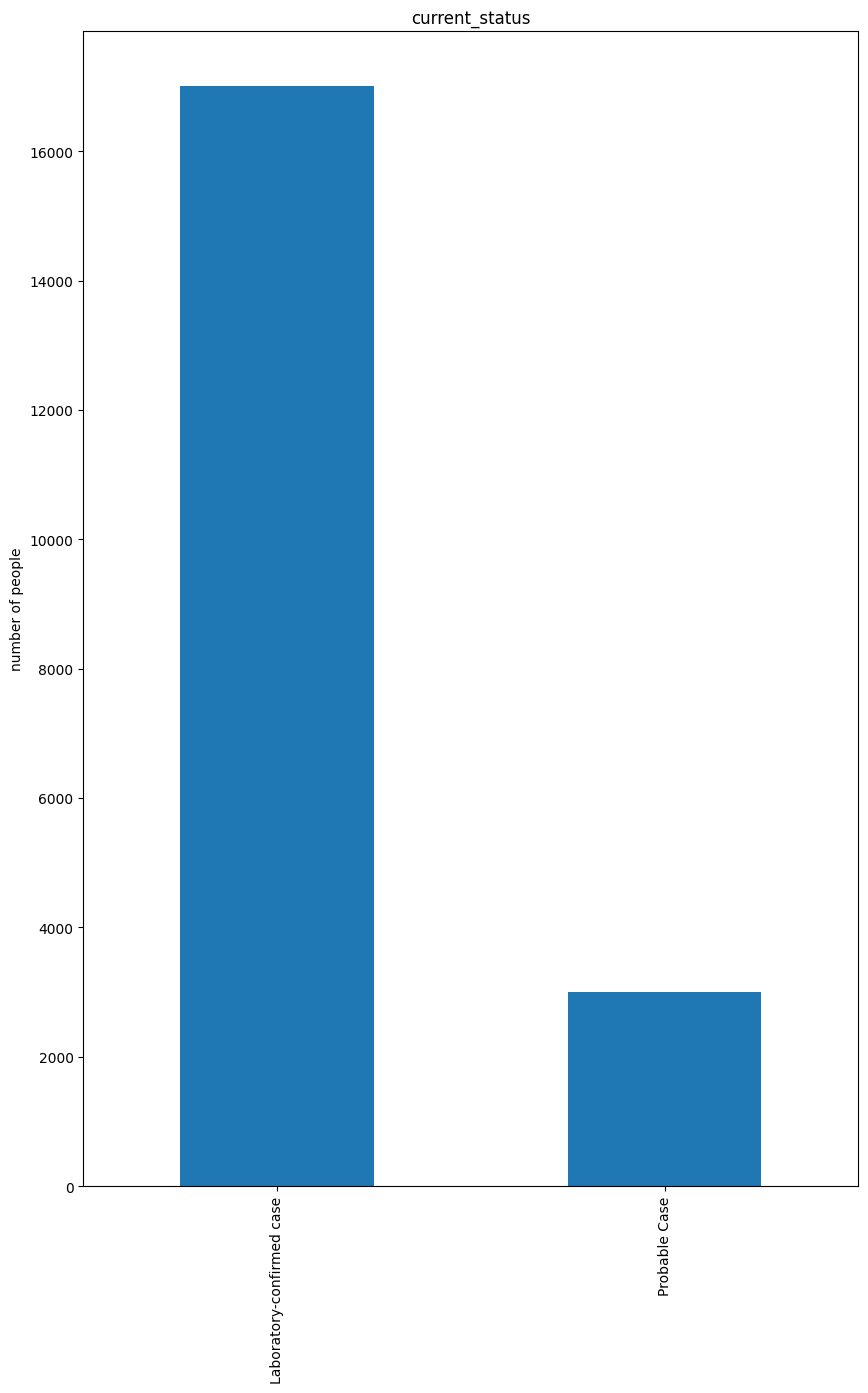

In [47]:
df['current_status'].value_counts().plot(kind='bar',figsize=(10,15))
plt.title('current_status')
plt.ylabel('number of people')
plt.savefig('category_barplots_1-6.pdf')

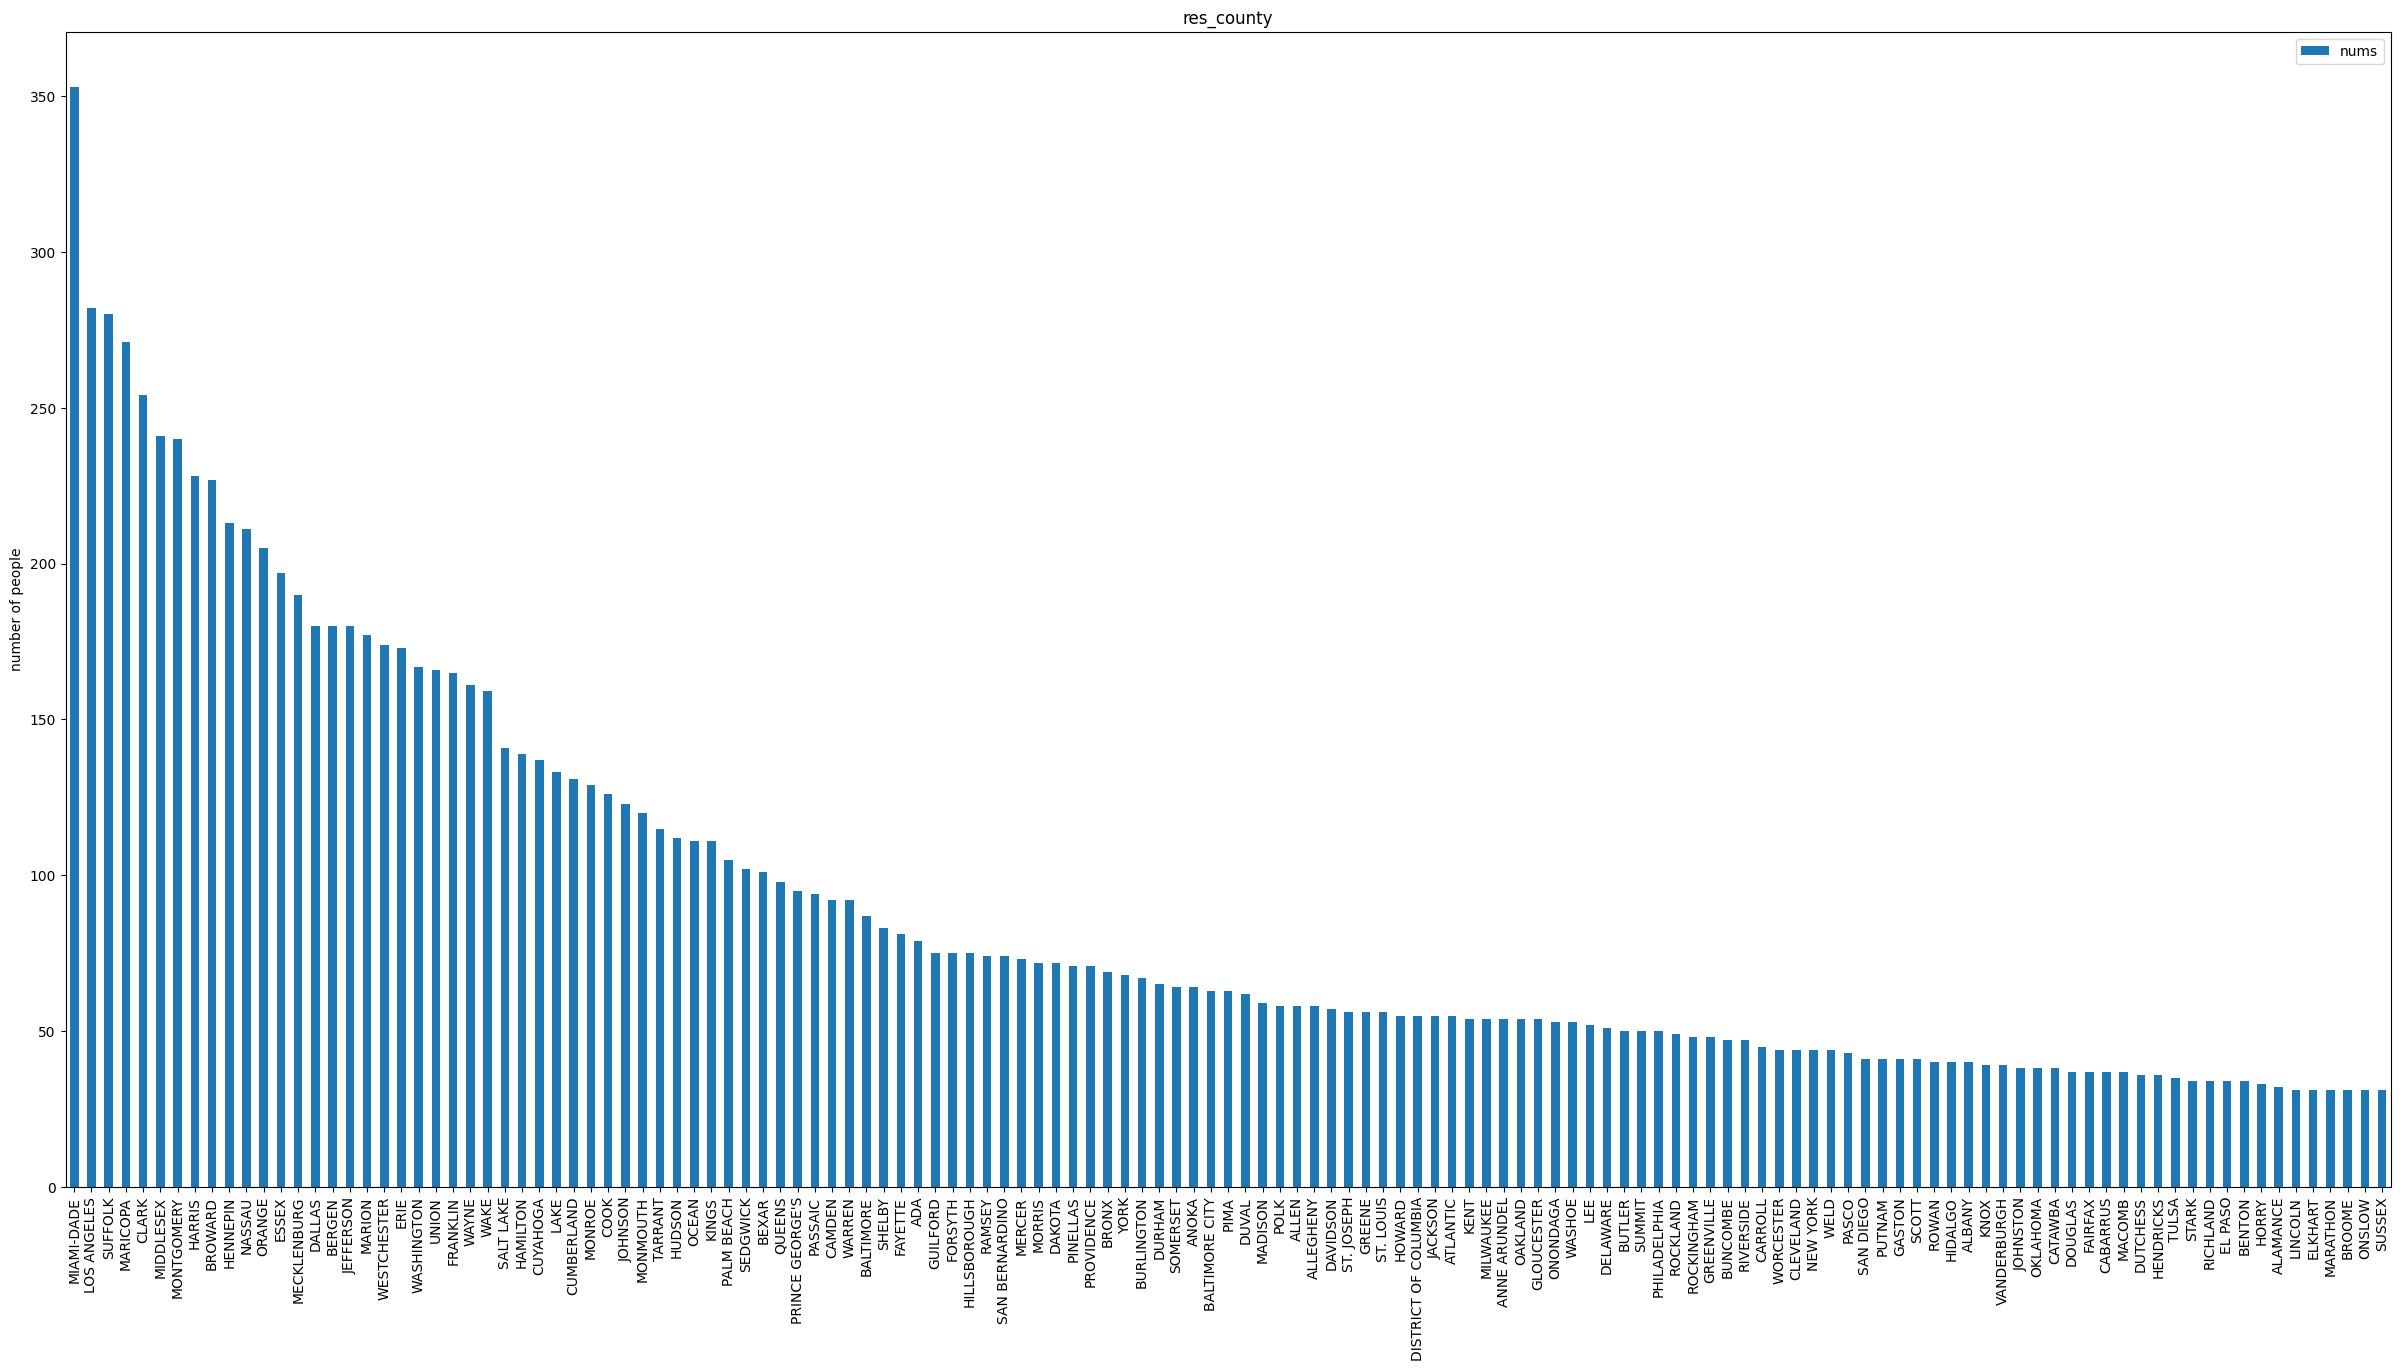

In [28]:
#delete data that lower than certain rage, so that the chart may look more short
d = pd.DataFrame(df['res_county'].value_counts())
d.columns = ['nums']
d = d[d['nums'] >30]
d.plot(kind='bar',figsize=(30,15))
plt.title('res_county')
plt.ylabel('number of people')
plt.savefig('category_barplots_1-4.pdf')

        

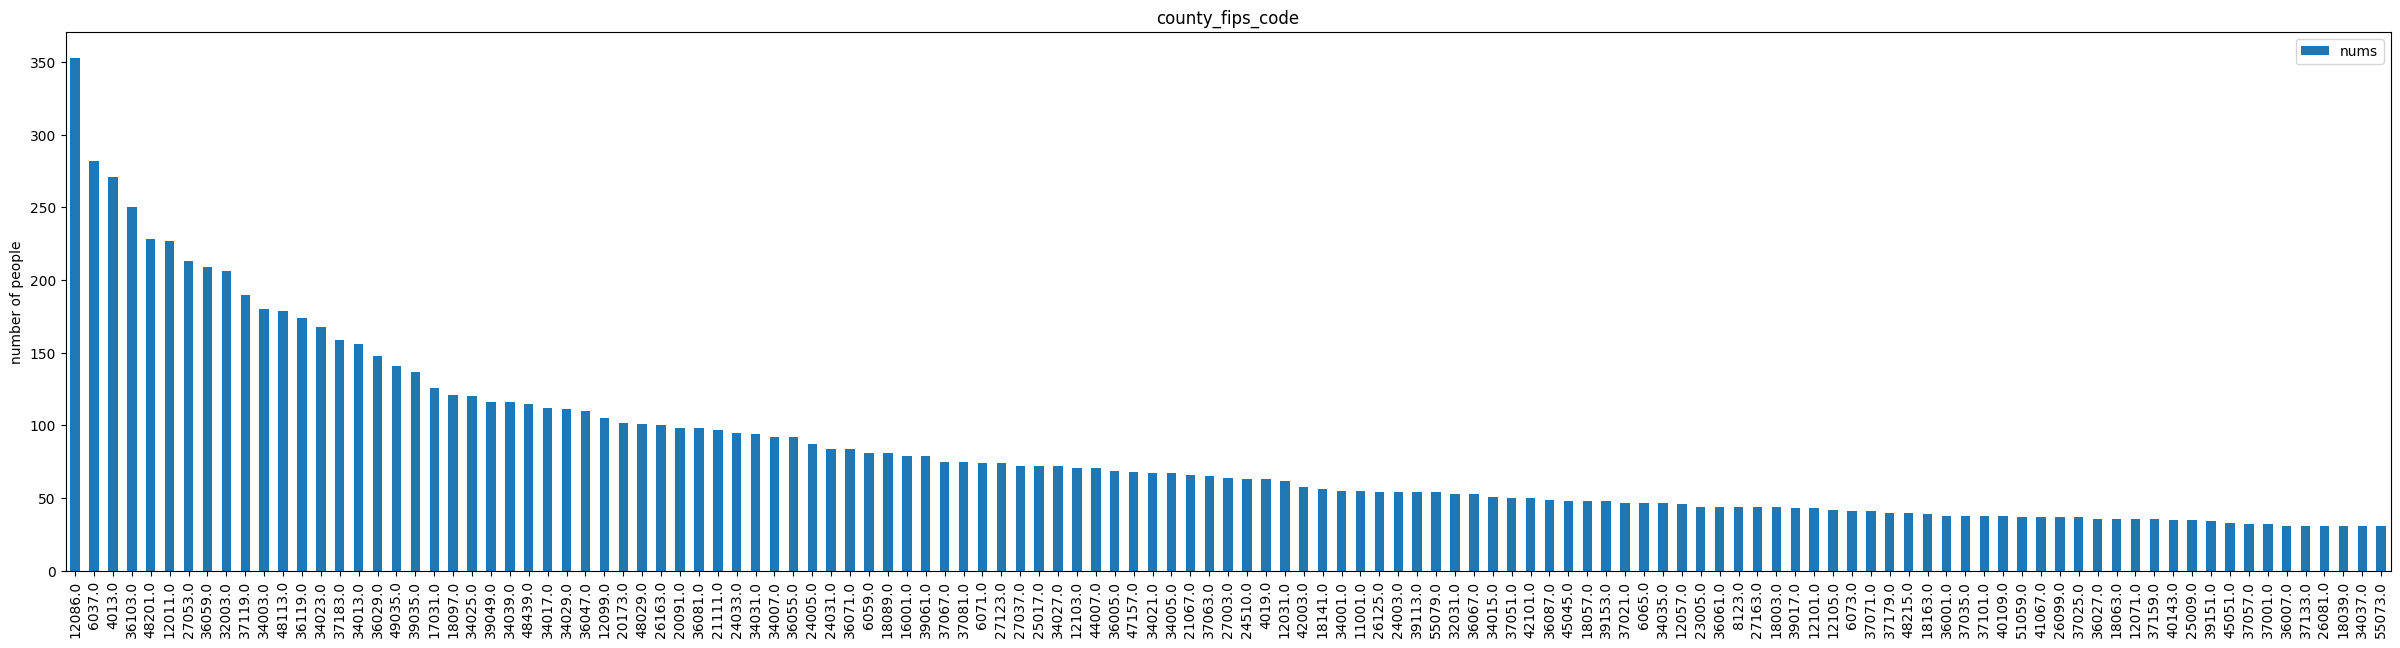

In [29]:
d = pd.DataFrame(df['county_fips_code'].value_counts())
d.columns = ['nums']
d = d[d['nums'] >30]
d.plot(kind='bar',figsize=(30,7))
plt.title('county_fips_code')
plt.ylabel('number of people')
plt.savefig('category_barplots_1-5.pdf')

# Excercise 2

# Summary of data quallity plan

|Variable names|Data qulity issue|Handing Strategy|
|------------------------------------|-------------------------------|--------------------------------|
|res_county|too many Sparse Data|delete data below 30|
|county_fips_code|too many Sparse Data|delete data below 30|
|age_group|too many ambiguous data|remove them when drawing plot|
|sex|too many ambiguous data|remove them when drawing plot|
|race|too many ambiguous data|remove them when drawing plot|
|ethnicity|too many ambiguous data|remove them when drawing plot|
|case_positive_specimen_interval|nagetive value(62 rows)|take absolute value|
|case_onset_interval|nagetive value(291 rows)|take absolute value|
|process|too many ambiguous data|remove them when drawing plot|
|exposure_yn|over 90% data are"Missing" while rest is "Yes"|do not analysis it|
|current_status|unsuit data type|change data type to "category"|
|symptom_status|too many ambiguous data|remove them when drawing plot|
|hosp_yn|too many ambiguous data|remove them when drawing plot|
|icu_yn|too many ambiguous data|remove them when drawing plot|
|death_yn|unsuit data type|change data type to "category"|
|underlying_conditions_yn|over 90% data are null while rest is "Yes"|delete it from dataset|
|case_month|unsuit data type|change data type to "category"|
|res_state|unsuit data type|change data type to "category"|
|state_fips_code|unsuit data type|change data type to "category"|

In [55]:
#save the changes into a new file
new_file=df.to_csv("new_file.csv")

# Excercise 3

In [36]:
df=pd.read_csv("new_file.csv")
df.to_csv("new_file.csv",index=False)

In [37]:
df["sex"]=df["sex"].astype('category')
df["death_yn"]=df["death_yn"].astype("category")
df["sex"]=df["sex"].astype('category')
df["case_month"]=df["case_month"].astype("category")

sex
Index 	 Count
Male 	 9381
Female 	 10092
nan 	 0
                    percent
sex     death_yn           
Female  No        77.596116
        Yes       22.403884
Male    No        71.229080
        Yes       28.770920
Missing No         0.000000
        Yes        0.000000
Unknown No         0.000000
        Yes        0.000000


C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\3528896825.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100


(0.0, 100.0)

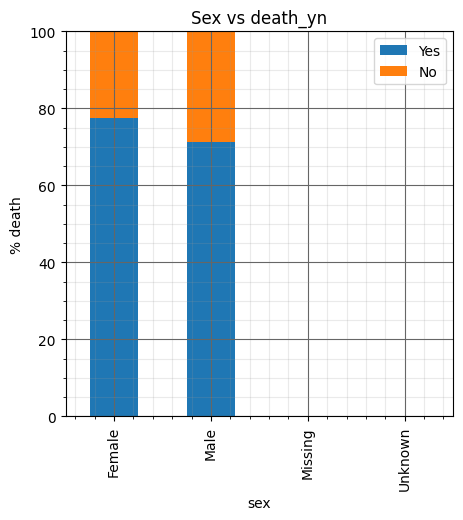

In [38]:
df['sex'] = df['sex'].drop(df['sex'][df['sex'] == 'Missing'].index)
df['sex'] = df['sex'].drop(df['sex'][df['sex'] == 'Unknown'].index)

maxDelqEver = pd.unique(df['sex'].ravel())
df['percent'] = 0

#print header
print("sex")
print("Index \t Count")

for i in maxDelqEver:
    
    count = df[df["sex"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['sex'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','sex','death_yn']].groupby(['sex','death_yn']).sum()
print(group)
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Sex vs death_yn", figsize=(5,5), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Yes", "No"])
    
# add gridlines
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("sex")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

age_group
Index 	 Count
65+ years 	 6204
50 to 64 years 	 3284
18 to 49 years 	 7709


C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\3974333381.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100


nan 	 0
0 - 17 years 	 2644
                            percent
age_group      death_yn            
0 - 17 years   No        100.000000
               Yes         0.000000
18 to 49 years No         98.832533
               Yes         1.167467
50 to 64 years No         84.165652
               Yes        15.834348
65+ years      No         29.497099
               Yes        70.502901


(0.0, 100.0)

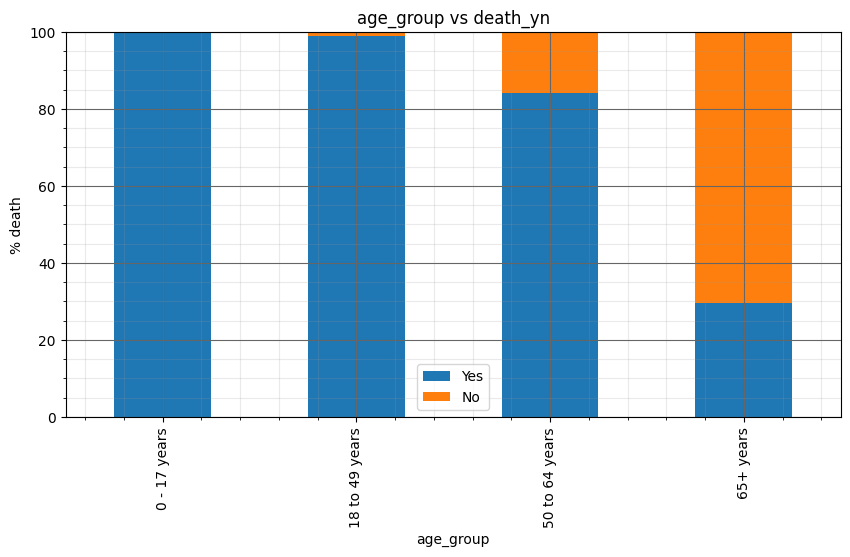

In [39]:
df['age_group'] = df['age_group'].drop(df['age_group'][df['age_group'] == 'Missing'].index)
df['age_group'] = df['age_group'].drop(df['age_group'][df['age_group'] == 'Unknown'].index)

maxDelqEver = pd.unique(df['age_group'].ravel())
df['percent'] = 0

#print header
print("age_group")
print("Index \t Count")

for i in maxDelqEver:
    
    count = df[df["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()
print(group)
my_plot = group.unstack().plot(kind='bar', stacked=True, title="age_group vs death_yn", figsize=(10,5), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Yes", "No"])
    
# add gridlines
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("age_group")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2597457854.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2597457854.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


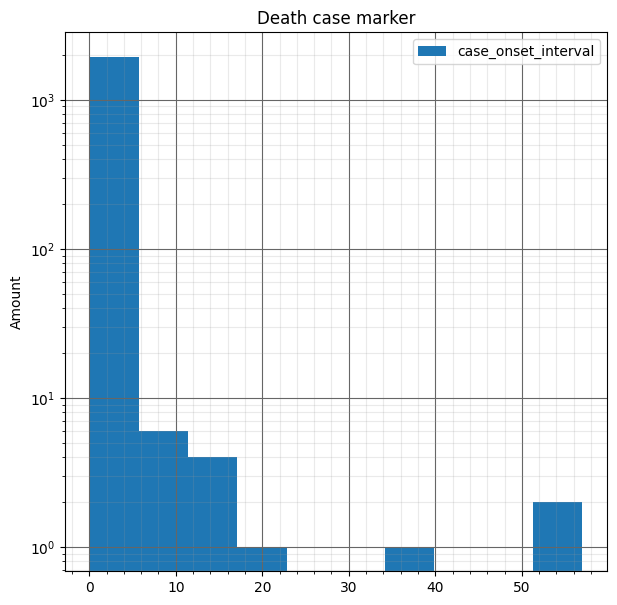

In [40]:
df['case_onset_interval'] = df['case_onset_interval'].abs()

df[df['death_yn'] == "Yes"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Death case marker",log=True)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.ylabel('Amount')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

age_group
Index 	 Count
2021-08 	 831
2020-12 	 1666
2021-02 	 523
2020-04 	 801
2020-03 	 302
2020-10 	 531
2021-07 	 337
2021-01 	 1479
2021-12 	 1418
2020-07 	 528
2022-05 	 629
2020-11 	 1317
2021-09 	 743
2020-09 	 355
2020-06 	 275
2022-08 	 370
2020-08 	 389
2022-01 	 2735
2022-06 	 416
2021-11 	 671
2021-06 	 105
2020-05 	 339
2021-04 	 419
2021-10 	 489
2022-07 	 474
2022-04 	 239
2021-03 	 463
2022-02 	 357
2022-09 	 250
2021-05 	 168
2020-01 	 4
2022-10 	 183
2022-03 	 110
2020-02 	 1
2022-11 	 83
                        percent
case_month death_yn            
2020-01    No          0.000000
           Yes       100.000000
2020-02    No          0.000000
           Yes       100.000000
2020-03    No         31.125828
...                         ...
2022-09    Yes         4.800000
2022-10    No         95.081967
           Yes         4.918033
2022-11    No        100.000000
           Yes         0.000000

[70 rows x 1 columns]


(0.0, 100.0)

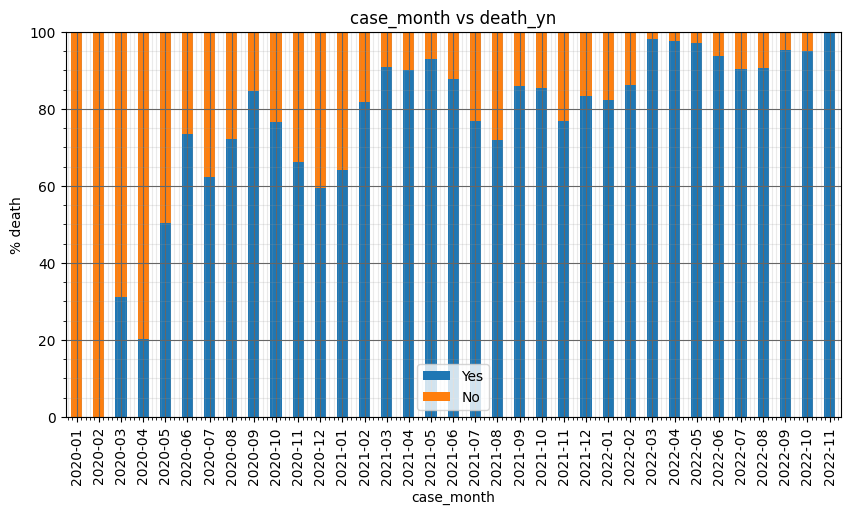

In [41]:

maxDelqEver = pd.unique(df['case_month'].ravel())
df['percent'] = 0

#print header
print("age_group")
print("Index \t Count")

for i in maxDelqEver:
    
    count = df[df['case_month'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['case_month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','case_month','death_yn']].groupby(['case_month','death_yn']).sum()
print(group)
my_plot = group.unstack().plot(kind='bar', stacked=True, title="case_month vs death_yn", figsize=(10,5), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Yes", "No"])
    
# add gridlines
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("case_month")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

Explain：
The reason I choose death_yn as the the only onr interactive feature with other four is death_yn is the target feature of the dataset.
Here I choose 2 categorial data and 2 continuous data to see their correlation with death percent.
Finding:
In tne sex vs death_yn correlation plot I found that male have a higher death rate than female.
And in age_group vs death_yn correlation plot there's a increasing death rate with the increasing age.
And in later 2 continuous feature vs death_yn correlation plot you can see most data concentrate in 0-1 weeks, that might because in the begining process of Covid, most people did their first test after they heave had sympotom, and death rate at the same time is very high, that explain why most death case concentrate in 0-1 weeks.
Last, in case_month vs death_yn plot I found with the time going, death rate decreased to 0 at 2022-11.

# Excercise 4

In [42]:
df=pd.read_csv("new_file.csv")
df.to_csv("new_file.csv",index=False)

The idea of creating new features is follow: find hospital case in clinical reported--find icu case in hospital---find death rate in icu cases

check how many cases in hospital that were reported by clinical evaluation

In [45]:
#exclude meaningless value in feature
new_process=df['process'][~df['process'].isin(['Missing','Unknown'])]
new_hosp_yn=df[~df['hosp_yn'].isin(['Missing','Unknown'])]
new_icu_yn=df[~df['icu_yn'].isin(['Missing','Unknown'])]
df['hosp_y'] = df['hosp_yn']=='Yes'
df['icu_y'] = df['icu_yn']=='Yes'

<AxesSubplot: >

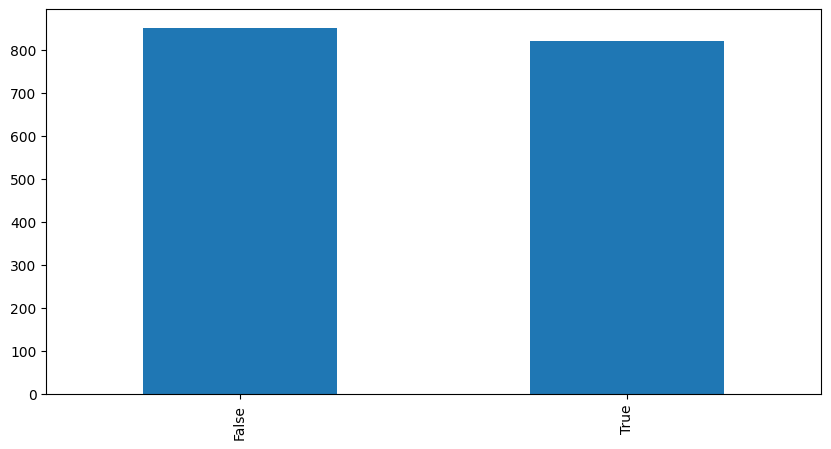

In [46]:
df['process_clinical_evaluation']=new_process=='Clinical evaluation'

df['process_clinical_evaluation'] = df['process_clinical_evaluation'].astype('category')
df["process_clinical_evaluation"].value_counts().plot(kind='bar', figsize=(10,5))

process_clinical_evaluation
Index 	 Count
False 	 851
nan 	 0
True 	 820


C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2921716390.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100
C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2921716390.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2921716390.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


(0.0, 100.0)

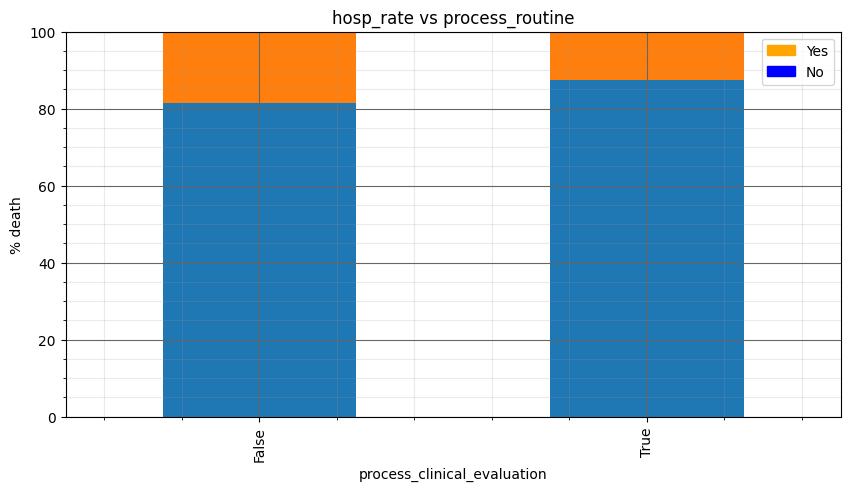

In [47]:
#Using code from the module lab
maxDelqEver = pd.unique(df['process_clinical_evaluation'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('process_clinical_evaluation')
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df['process_clinical_evaluation'] == i].count()['hosp_y']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['process_clinical_evaluation'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','process_clinical_evaluation','hosp_y']].groupby(['process_clinical_evaluation','hosp_y']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="hosp_rate vs process_routine", figsize=(10,5))

# add legend
red_patch = mpatches.Patch(color='orange', label='Yes')
blue_patch = mpatches.Patch(color='blue', label='No')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("process_clinical_evaluation")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

check howmany cases were in icu that were in hospital

<AxesSubplot: >

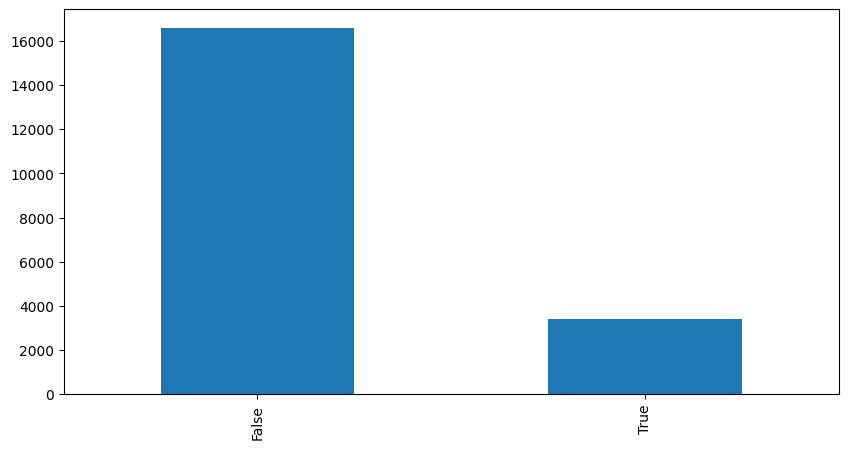

In [48]:
df['hosp_y'] = df['hosp_y'].astype('category')
df["hosp_y"].value_counts().plot(kind='bar', figsize=(10,5))

hosp_y
Index 	 Count
True 	 3406
False 	 16594


C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2091012799.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\2091012799.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


(0.0, 100.0)

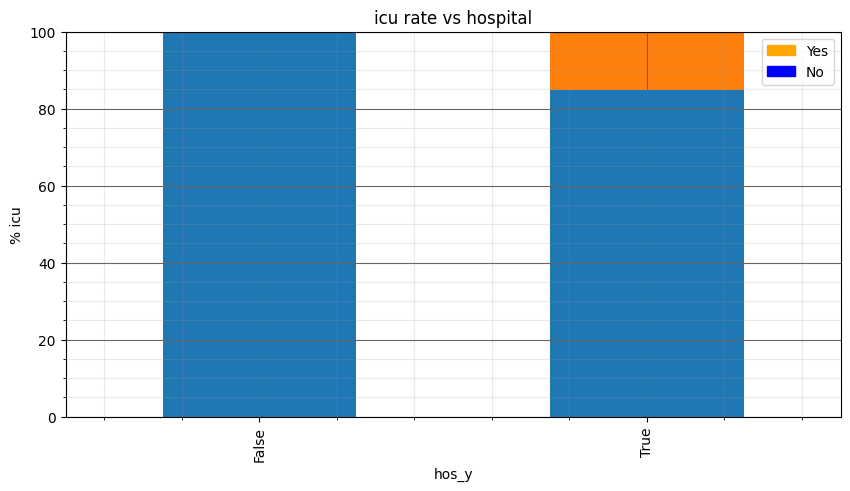

In [49]:
#Using code from the module lab
maxDelqEver = pd.unique(df['hosp_y'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('hosp_y')
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df['hosp_y'] == i].count()['icu_y']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_y'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_y','icu_y']].groupby(['hosp_y','icu_y']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="icu rate vs hospital", figsize=(10,5))

# add legend
red_patch = mpatches.Patch(color='orange', label='Yes')
blue_patch = mpatches.Patch(color='blue', label='No')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("hos_y")
my_plot.set_ylabel("% icu")
my_plot.set_ylim([0,100])

check how many cases in icu that dead

<AxesSubplot: >

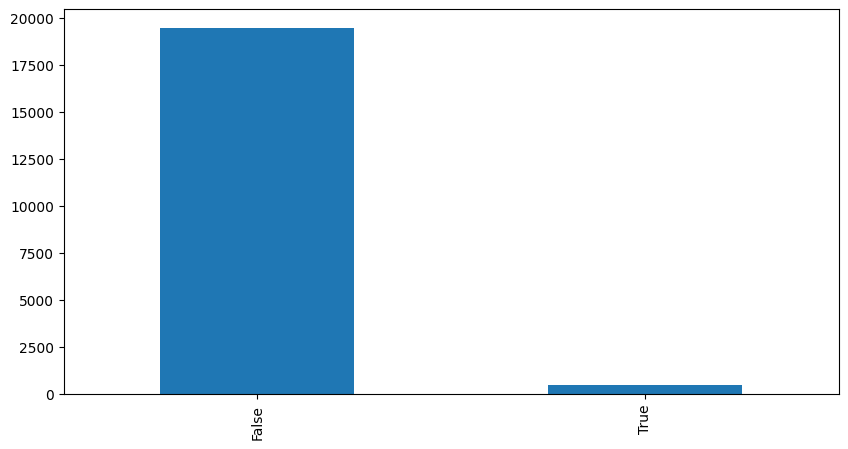

In [50]:
df['icu_y'] = df['icu_y'].astype('category')
df["icu_y"].value_counts().plot(kind='bar', figsize=(10,5))

icu_y
Index 	 Count
False 	 19481
True 	 519


C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\4160820907.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\xuhuian\AppData\Local\Temp\ipykernel_4576\4160820907.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


(0.0, 100.0)

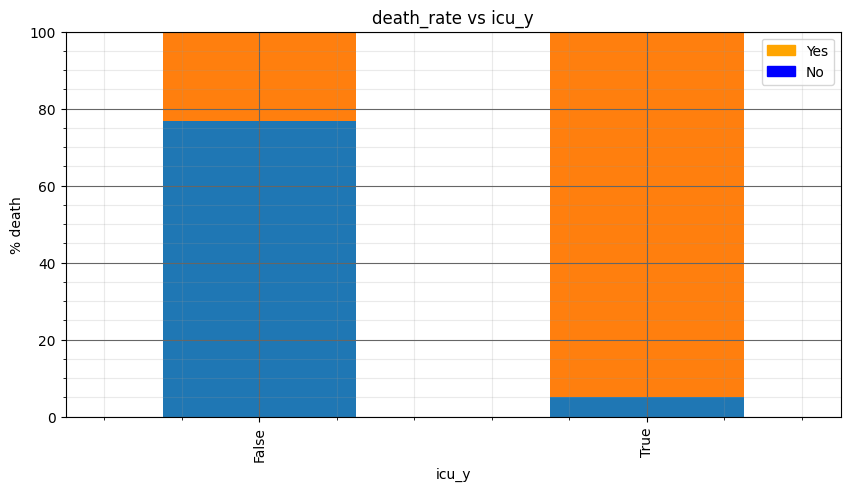

In [51]:
#Using code from the module lab
maxDelqEver = pd.unique(df['icu_y'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('icu_y')
print("Index \t Count")

# for each income level
for i in maxDelqEver:
    
    count = df[df['icu_y'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['icu_y'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','icu_y','death_yn']].groupby(['icu_y','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_rate vs icu_y", figsize=(10,5))

# add legend
red_patch = mpatches.Patch(color='orange', label='Yes')
blue_patch = mpatches.Patch(color='blue', label='No')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
# my_plot.legend(["Yes", "No"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("icu_y")
my_plot.set_ylabel("% death")
my_plot.set_ylim([0,100])

save all new features into a new csv file

In [52]:
df[["process_clinical_evaluation",'hosp_y','icu_y','death_yn']].to_csv("4-transform.csv", index=False)